Importing necesarry libraries

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

Data Visualization:
• Visualize the relationship between the independent and dependent variables using
scatter plots.
• Look for any patterns or trends that may exist in the data.

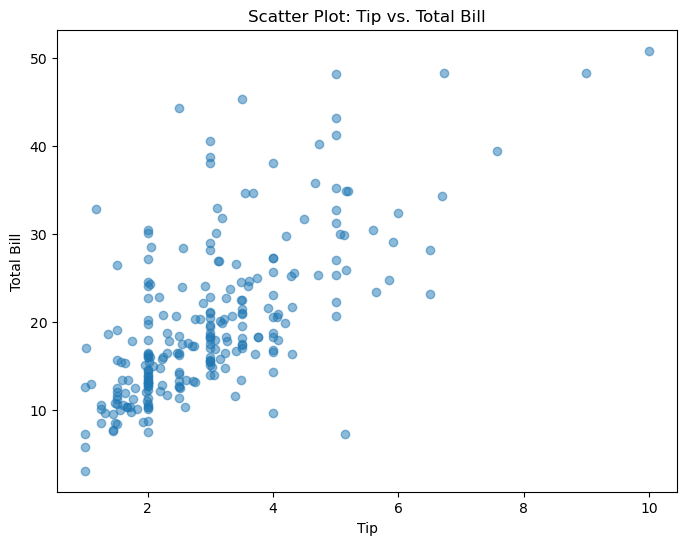

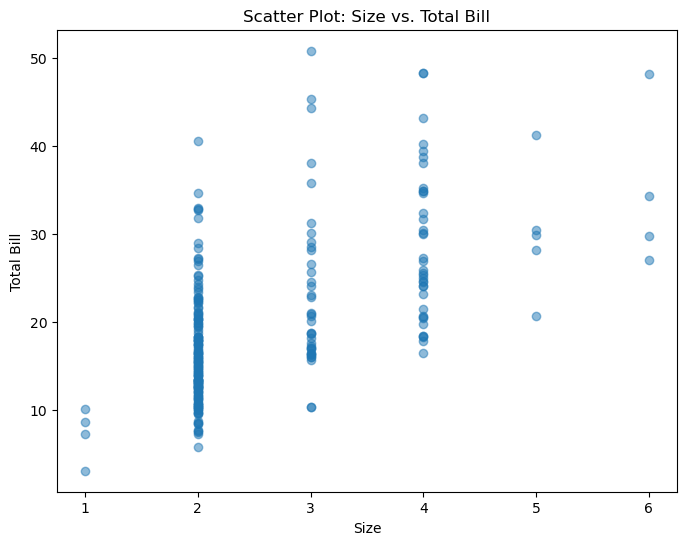

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('linearregression.csv')
data.columns = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

X = data[['tip', 'size']]
y = data['total_bill']


def plot_scatter(independent_var, dependent_var, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    plt.scatter(independent_var, dependent_var, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Scatter Plot: {xlabel} vs. {ylabel}')
    plt.show()


plot_scatter(X['tip'], y, 'Tip', 'Total Bill')
plot_scatter(X['size'], y, 'Size', 'Total Bill')


Model Building:
• Split the dataset into training and testing sets.
• Use libraries like scikit-learn to build a simple linear regression model.

In [10]:
import pandas as pd

data=pd.read_csv('linearregression.csv')
data.columns=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

data['sex']=data['sex'].str.lower()
data['smoker']=data['smoker'].str.lower()
data['day']=data['day'].str.lower()
data['time']=data['time'].str.lower()

X=data[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y=data['total_bill']

categorical_features=['sex', 'smoker', 'day', 'time']
numeric_features=['tip', 'size']
column_transformer=ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
    ('num', 'passthrough', numeric_features)
])
pipeline=Pipeline([
    ('preprocessor', column_transformer),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'day',
                                                   'time']),
                                                 ('num', 'passthrough',
                                                  ['tip', 'size'])])),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [11]:
y_pred=pipeline.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
comparison=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

Mean Squared Error (MSE): 31.873635550729905
R-squared (R2): 0.6240808714290971
     Actual  Predicted
24    19.82  18.961629
6      8.77  14.509842
153   24.55  20.762319
211   25.89  33.760814
198   13.00  15.190147
176   17.89  17.281552
192   28.44  17.712118
124   12.48  13.935104
9     14.78  18.097342
101   15.38  20.123985
45    18.29  17.426508
233   10.77  13.974130
117   10.65  10.960104
177   14.48  17.281552
82    10.07   8.796365
146   18.64  13.678009
200   18.71  25.038356
15    21.58  20.109841
66    16.45  16.002158
142   41.19  31.435789
33    20.69  22.196301
19    20.65  22.583701
109   14.31  23.236367
30     9.55  13.915796
186   20.90  23.894151
120   11.69  14.211242
10    10.27  13.664009
73    25.28  26.153033
159   16.49  20.762319
156   48.17  35.764794
112   38.07  23.469413
218    7.74  16.658339
25    17.81  22.764106
60    20.29  21.820838
18    16.97  21.122441
119   24.08  21.354247
97    12.03  16.637623
197   43.11  30.192622
139   13.16  14.605937


In [12]:
def handle_user_query(query, model, feature_columns):
    categorical_features=['sex', 'smoker', 'day', 'time']
    for feature in categorical_features:
        if feature in query:
            query[feature]=query[feature].lower()  # Convert to lowercase
    query_df=pd.DataFrame([query], columns=feature_columns)
    prediction=model.predict(query_df)
    return prediction[0]
feature_columns=['tip', 'sex', 'smoker', 'day', 'time', 'size']


In [14]:
while True:
    print("\nEnter query details or 'quit' to exit:")
    tip_input = input("Enter tip amount: ")
    if tip_input.lower() == 'quit':
        break
    try:
        tip = float(tip_input)
    except ValueError:
        print("Invalid input. Please enter a valid number.")
        continue

    sex = input("Enter sex (Male/Female): ")
    smoker = input("Is there a smoker? (Yes/No): ")
    day = input("Enter day of the week (e.g., Sun): ")
    time = input("Enter time of day (e.g., Dinner): ")
    size_input = input("Enter party size: ")
    try:
        size = int(size_input)
    except ValueError:
        print("Invalid input. Please enter a valid integer for party size.")
        continue

    query = {
        'tip': tip,
        'sex': sex,
        'smoker': smoker,
        'day': day,
        'time': time,
        'size': size
    }

    response = handle_user_query(query, pipeline, feature_columns)
    print(f"Predicted total bill amount: ${response:.2f}")



Enter query details or 'quit' to exit:
Enter tip amount: 4
Enter sex (Male/Female): male
Is there a smoker? (Yes/No): no
Enter day of the week (e.g., Sun): sun
Enter time of day (e.g., Dinner): dinner
Enter party size: 8
Predicted total bill amount: $39.10

Enter query details or 'quit' to exit:
Enter tip amount: quit
